In [52]:
print('KerasSyntax')

KerasSyntax


In [65]:
import pandas as pd 
import numpy as np 

import seaborn as sns

In [76]:
df = pd.read_csv('C:/Users/Aman/Documents/Aman UJ/Practice/TF_2_Notebooks_and_Data/DATA/fake_reg.csv')

In [85]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


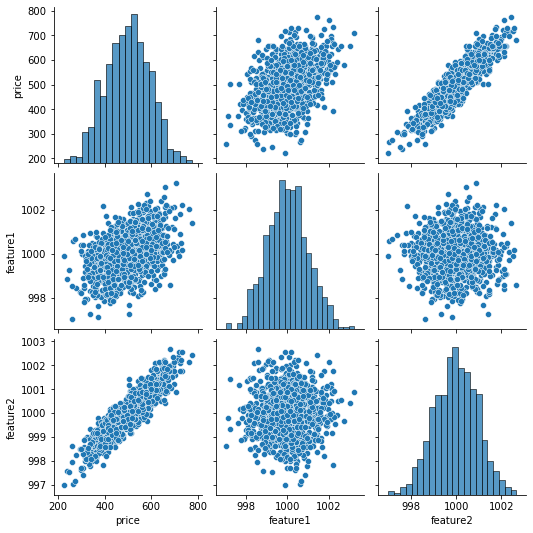

In [90]:
sns.pairplot(df)

In [96]:
from sklearn.model_selection import train_test_split

In [99]:
X = df[['feature1','feature2']].values

In [102]:
y = df[['price']].values

In [103]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X_train.shape

(700, 2)

In [106]:
X_test.shape

(300, 2)

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
#help(MinMaxScaler)

In [113]:
scaler = MinMaxScaler()

In [114]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [115]:
X_train = scaler.transform(X_train)

In [116]:
X_test = scaler.transform(X_test)

In [117]:
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [127]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',
                loss='mse')

In [128]:
model.fit(x=X_train,y=y_train,epochs=250)

==============================] - 0s 864us/step - loss: 254188.8281
Epoch 21/250
22/22 [==============================] - 0s 864us/step - loss: 253867.1719
Epoch 22/250
22/22 [==============================] - 0s 819us/step - loss: 253516.4375
Epoch 23/250
22/22 [==============================] - 0s 819us/step - loss: 253134.6562
Epoch 24/250
22/22 [==============================] - 0s 864us/step - loss: 252721.3906
Epoch 25/250
22/22 [==============================] - 0s 864us/step - loss: 252277.0000
Epoch 26/250
22/22 [==============================] - 0s 864us/step - loss: 251794.3750
Epoch 27/250
22/22 [==============================] - 0s 864us/step - loss: 251275.5000
Epoch 28/250
22/22 [==============================] - 0s 955us/step - loss: 250718.0156
Epoch 29/250
22/22 [==============================] - 0s 864us/step - loss: 250120.0469
Epoch 30/250
22/22 [==============================] - 0s 864us/step - loss: 249479.3594
Epoch 31/250
22/22 [==============================] 

In [130]:
loss_df = pd.DataFrame(model.history.history)

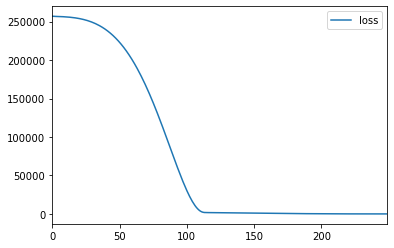

In [131]:
loss_df.plot()

In [133]:
model.evaluate(X_train,y_train,verbose=0)

24.51323890686035

In [134]:
model.evaluate(X_test,y_test,verbose=0)

25.829561233520508

In [135]:
test_pediction = model.predict(X_test)

In [139]:
test_pediction = pd.Series(test_pediction.reshape(300,))

In [140]:
test_pediction

0      406.375214
1      622.963745
2      591.619324
3      572.441956
4      368.763794
          ...    
295    529.530884
296    516.831970
297    609.094482
298    417.591064
299    412.212616
Length: 300, dtype: float32

In [152]:
pred_df = pd.DataFrame(y_test,columns=['Test True y'])

In [153]:
pred_df = pd.concat([pred_df,test_pediction],axis=1)

In [159]:
pred_df.columns = ['Test true y','Model Pred']

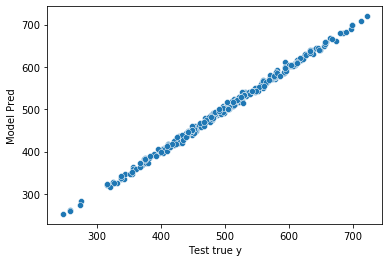

In [161]:
sns.scatterplot(x='Test true y',y='Model Pred',data=pred_df)

In [162]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [163]:
mean_absolute_error(pred_df['Test true y'],pred_df['Model Pred'])

4.119479326236802

In [164]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [165]:
mean_squared_error(pred_df['Test true y'],pred_df['Model Pred'])

25.82956598755792

In [166]:
new_gem = [[998,1000]]

In [167]:
new_gem = scaler.transform(new_gem)

In [168]:
model.predict(new_gem)

array([[421.37564]], dtype=float32)

In [169]:
from tensorflow.keras.models import load_model

In [170]:
model.save('my_gem_model.h5')

In [171]:
later_model = load_model('my_gem_model.h5')

In [172]:
later_model.predict(new_gem)

array([[421.37564]], dtype=float32)